In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel

In [28]:
can_data = np.array([101.8, 101.5, 102.6, 101, 101.8, 96.8, 102.4, 100, 98.8,
                    98.1, 98.8, 98, 99.4, 95.5, 100.1, 100.5, 97.4, 100.2, 101.4,
                    98.7, 101.4, 99.4, 101.7, 99, 99.7, 98.8, 99.5, 100, 99.7, 100.9,
                    99.7, 99, 98.8, 99.7, 100.9, 99.9, 97.5, 101.5, 98.2, 99.2, 98.6,
                    101.4, 102.1, 102.9, 100.8, 99.4, 103.7, 100.3, 100.2, 101.1, 101.8,
                    100, 101.2, 100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1, 100.1,
                    101.6, 99.3, 96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9, 101.2, 
                    99.9, 99.1, 100.7, 100.8, 100.8, 101.4, 100.3, 98.4, 97.2])

In [29]:
group_A = np.random.choice(can_data, 15, replace=True)
group_B = np.random.choice(can_data, 17, replace=True)

print("_________________Group A______________________")
print(group_A)
print("_________________Group B______________________")
print(group_B)

_________________Group A______________________
[ 96.8  99.   99.7  99.7  99.7 100.8 100.   97.5  98.4  95.5 100.9 101.4
  99.7 100.9  96.1]
_________________Group B______________________
[101.8  99.1  96.8 101.  100.  101.6 100.1 102.9 101.8 101.6  99.9  95.5
  96.1 100.3 100.   97.2 100.8]


In [30]:
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=True, alternative = "two-sided")

print("Test statistic is {}".format(np.round(t_stat, 4)))
print("P-value is {}".format(np.round(p_value, 4)))

Test statistic is -1.0065
P-value is 0.3222


In [31]:
t_stat, p_value1 = ttest_ind(group_A, group_B, equal_var=True, alternative="less")

print("P-value is {}".format(np.round(p_value1, 4)))

P-value is 0.1611


In [32]:
t_stat, p_value2 = ttest_ind(group_A, group_B, equal_var = True, alternative = "greater")

print("P-value is {}".format(np.round(p_value2,4)))

P-value is 0.8389


<Axes: >

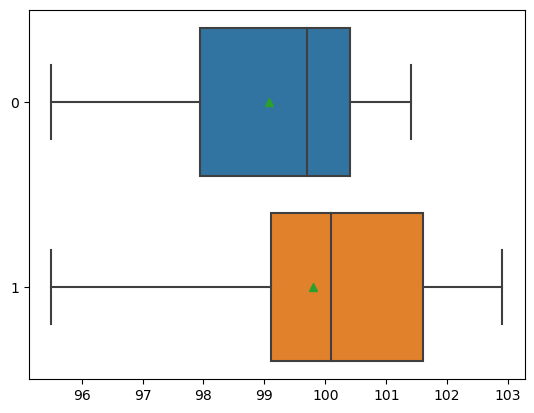

In [33]:
sns.boxplot(data=[group_A, group_B], orient='h', showmeans = True)

In [34]:
midterm = np.array([80, 73, 70, 60, 88, 84, 65, 37, 91, 89, 52, 78, 40, 79, 59])
final = np.array([82, 71, 95, 69, 100, 71, 75, 60, 95, 99, 65, 83, 60, 86, 62])

In [35]:
t_stat, p_value = ttest_rel(midterm, final, alternative = 'less')

print("Test statistic is {}".format(np.round(t_stat, 4)))
print("p-value is {}".format(np.round(p_value, 4)))

Test statistic is -3.3886
p-value is 0.0022


<Axes: >

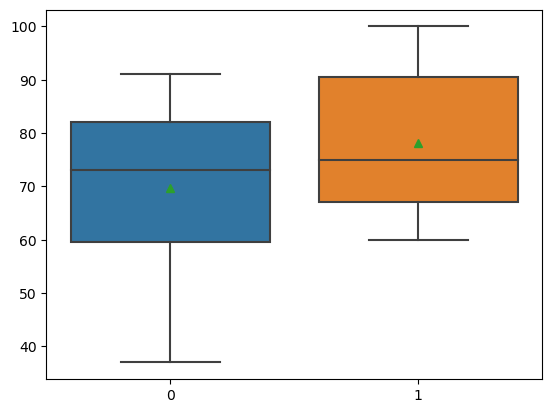

In [36]:
sns.boxplot(data = [midterm, final], orient = 'v', showmeans = True)

### In a class A, 4 students were absent among 25 students, and 6 students were absent among 20 students in a class of B. Test if the absent proportion of the A class is less than that of B class at α=0.05 

In [37]:
from scipy.stats import norm

def two_prop(x, n1, y, n2, alternative):
    phat1 = x/n1
    phat2 = y/n2
    phat = (x+y)/(n1+n2)
    
    t_stat = (phat1 - phat2)/(np.sqrt(phat*(1-phat))*np.sqrt(1/n1+1/n2))
    
    if alternative == 'less':
        p_value = norm.cdf(t_stat)
    elif alternative == 'greater':
        p_value = 1-norm.cdf(t_stat)
    else:
        p_value = 2*(1-norm.cdf(t_stat))
    return t_stat, p_value

In [38]:
t_stat, p_value = two_prop(4, 25, 6, 20, 'less')

print("Test statistic is {}".format(np.round(t_stat, 4)))
print("P-value is {}".format(np.round(p_value, 4)))

Test statistic is -1.1225
P-value is 0.1308


## Test if the two groups have equal variances at a=0.05

In [39]:
group_A = can_data[0:10]
group_B = can_data[-10:]

print("_________________Group A______________________")
print(group_A)
print("_________________Group B______________________")
print(group_B)

_________________Group A______________________
[101.8 101.5 102.6 101.  101.8  96.8 102.4 100.   98.8  98.1]
_________________Group B______________________
[101.2  99.9  99.1 100.7 100.8 100.8 101.4 100.3  98.4  97.2]


In [42]:
from scipy.stats import f

def test_var2(x, y, alternative):
    t_stat = np.var(x, ddof=1)/np.var(y, ddof=1)
    df1 = len(x)-1
    df2 = len(y)-1
    
    if alternative=='less':
        p_value = f.cdf(t_stat, df1, df2)
    elif alternative =='greater':
        p_value = 1-f.cdf(t_stat, df1, df2)
    else:
        p_value = 2*(1-f.cdf(t_stat, df1, df2))
    return t_stat, p_value

In [43]:
t_stat, p_value = test_var2(group_A, group_B, alternative = 'two_sided')

print("Test statistic is {}".format(np.round(t_stat,4)))
print("P-value is {}".format(np.round(p_value, 4)))

Test statistic is 2.1386
P-value is 0.2729


In [44]:
from scipy.stats import bartlett

out1 = bartlett(group_A, group_B)

print("Test statistic is {}".format(np.round(out1[0], 4)))
print("P-value is {}". format(np.round(out1[1], 4)))

Test statistic is 1.2032
P-value is 0.2727
